In [26]:
import pandas as pd

# Загрузка данных
file_path = "dataset/space_missions.csv"
data = pd.read_csv(file_path)

# Изучение структуры данных
print(data.info())  # Информация о столбцах и типах данных
print(data.head())  # Первые строки для обзора

# Анализ параметров
for column in data.columns:
    print(f"\nСтолбец: {column}")
    print(f"Тип данных: {data[column].dtype}")
    if data[column].dtype == 'object':
        print(data[column].value_counts().head(5))  # Частотность категорий
    elif data[column].dtype in ['int64', 'float64']:
        print(f"Медиана: {data[column].median()}")
        print(f"Среднее: {data[column].mean()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB
None
     Company                                   Location        Date      Time  \
0  RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-10-04  19:28:00   
1  RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-11-03  02:30:00   
2    US Navy   LC-18A, Cape Canaveral AFS, Florida, USA  1957-12-06  16:44:00   
3       AMBA   LC-26A, Cape Canaveral AFS, Florida

	2. Провести предпроцессинг данных: проанализировать выбросы и очистить набор данных.

ход работы

Шаг 1. Обработка пропущенных данных:
Определите пропуски в данных с помощью .isnull().sum().
Удалите или заполните пропуски, в зависимости от контекста.
Шаг 2. Поиск выбросов:
Для числовых данных используйте описательные статистики (.describe()) и визуализацию (ящики-боксплоты, гистограммы).
Для категориальных данных проверьте на наличие редких категорий или некорректных значений.
Шаг 3. Очистка данных:
Удалите выбросы или замените их, если это оправдано.
Приведите значения в столбцах к правильному формату.

C:\Users\mset6\AppData\Local\Temp\ipykernel_17420\2975533007.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Price'].fillna(data['Price'].median(), inplace=True)  # Заполняем медианой
d:\kursachMaad\.venv\Lib\site-packages\seaborn\categorical.py:383: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(n - .5, -.5, auto=None)


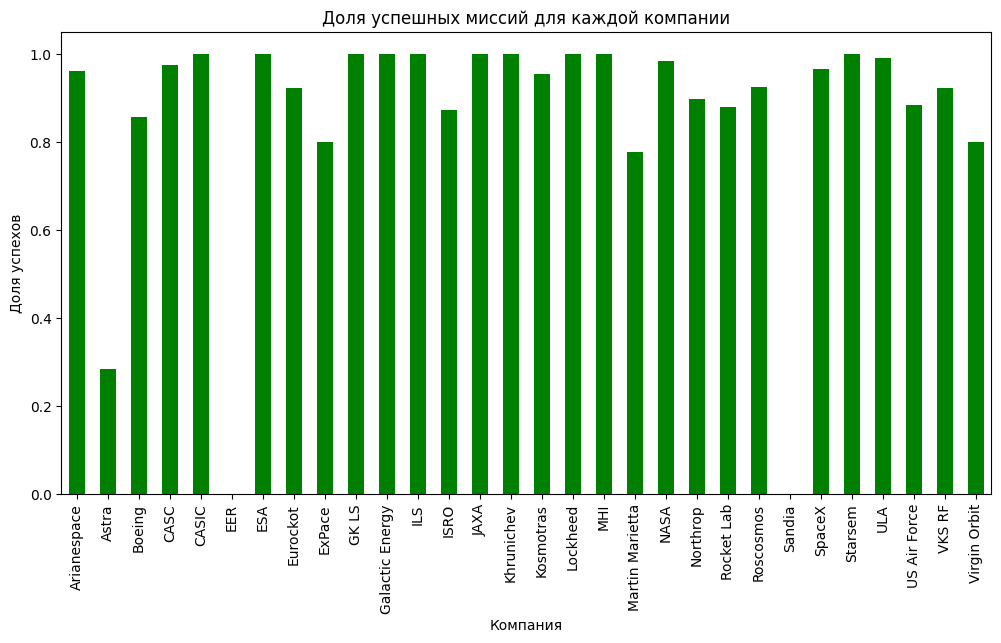

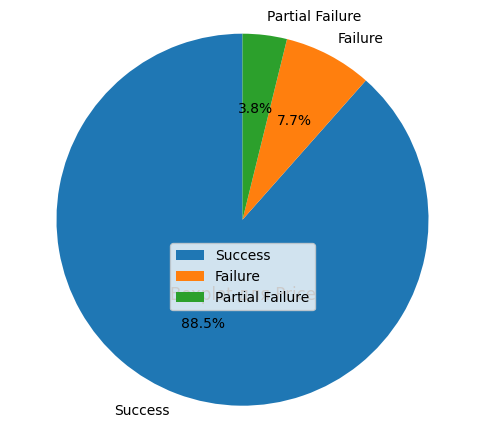

После обработки:
<class 'pandas.core.frame.DataFrame'>
Index: 3421 entries, 0 to 4628
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        3421 non-null   object        
 1   Location       3421 non-null   object        
 2   Date           3421 non-null   datetime64[ns]
 3   Time           3300 non-null   object        
 4   Rocket         3421 non-null   object        
 5   Mission        3421 non-null   object        
 6   RocketStatus   3421 non-null   object        
 7   Price          3421 non-null   float64       
 8   MissionStatus  3421 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 267.3+ KB
None


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


# Заполнение пропущенных значений в числовых столбцах
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')  # Преобразуем Price в числовой тип
data['Price'].fillna(data['Price'].median(), inplace=True)  # Заполняем медианой

# Проверка выбросов в числовых данных
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot для {column}")
    plt.show()

# Удаление выбросов с использованием межквартильного размаха (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in numeric_columns:
    data = remove_outliers(data, column)

# Приведение данных к единому формату (пример для Date)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Итоговые данные
print("После обработки:")
print(data.info())


	3. Сформулировать и проанализировать какую гипотезу или задачу можно поставить и решить используя этот набор данных.

Гипотеза 1. Конкретная компания влияет на успех своих миссий.


ход работы

Формулировка: Частота успешных запусков (MissionStatus = Success) зависит от компании (Company).
Методы анализа:

Построить таблицу с количеством успешных и неуспешных миссий для каждой компании.
Провести тест на зависимость (например, хи-квадрат) между компанией и статусом миссии.
Визуализировать долю успешных миссий для каждой компании.

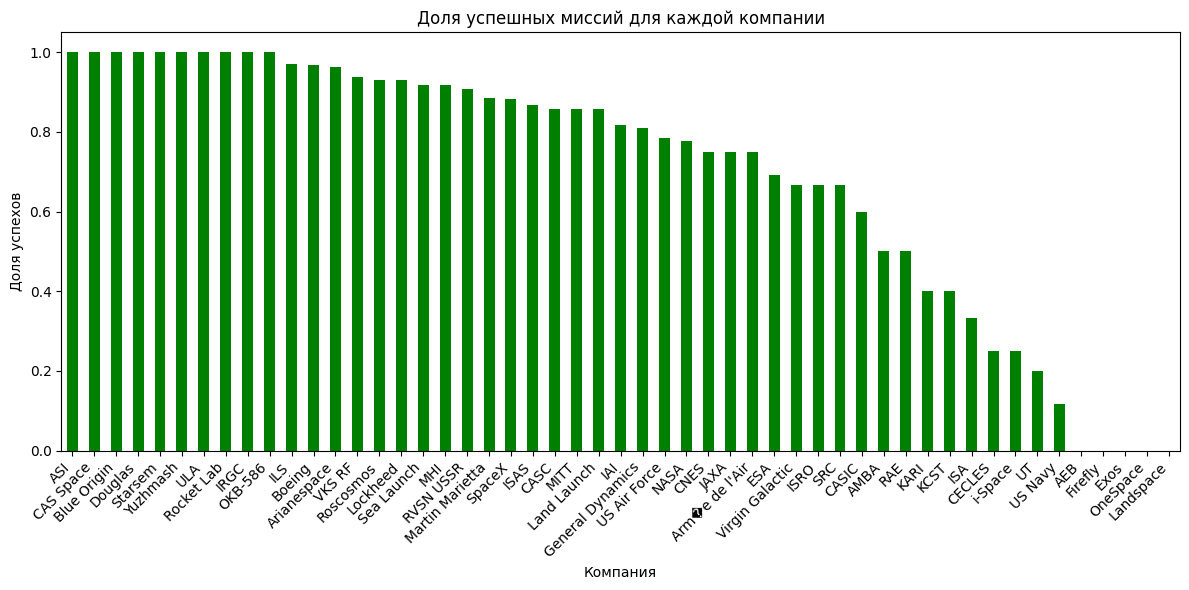

Результаты теста хи-квадрат:
Хи-квадрат: 935.1162675212815
p-значение: 1.161417114788935e-113
Есть статистически значимая зависимость между компанией и статусом миссии.


In [28]:
import scipy as sc

# Предобработка данных
data['MissionStatus'] = data['MissionStatus'].str.strip()  # Убираем лишние пробелы

# Подсчет количества успешных и неуспешных миссий для каждой компании
company_status = data.groupby(['Company', 'MissionStatus']).size().unstack(fill_value=0)

# Вычисление доли успешных миссий для каждой компании
success_rate = company_status.div(company_status.sum(axis=1), axis=0)

# Визуализация доли успешных миссий
plt.figure(figsize=(12, 6))
success_rate['Success'].sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Доля успешных миссий для каждой компании')
plt.xlabel('Компания')
plt.ylabel('Доля успехов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Проведение статистического теста (хи-квадрат) для проверки зависимости
chi2, p, dof, expected = sc.stats.chi2_contingency(company_status)
print("Результаты теста хи-квадрат:")
print(f"Хи-квадрат: {chi2}")
print(f"p-значение: {p}")

if p < 0.05:
    print("Есть статистически значимая зависимость между компанией и статусом миссии.")
else:
    print("Нет статистически значимой зависимости между компанией и статусом миссии.")



	4. Выделить правила, по которым можно описать датасет (например: кластеризацией выделить какой тип людей чаще всего покупают сладости вместе с алкоголем)

Ход работы


Для вашего датасета о космических миссиях можно выделить правила или шаблоны, используя методы кластеризации или анализа ассоциаций. Пример задачи для описания набора данных: определить, какие компании, локации или ценовые диапазоны чаще связаны с успешными миссиями.

Шаги для выполнения задачи:
1. Подготовка данных для кластеризации:
Выберите ключевые параметры, влияющие на успешность миссий (например, Company, Location, Price, MissionStatus).
Закодируйте категориальные данные с помощью методов, таких как one-hot-encoding.
Нормализуйте числовые данные.
2. Кластеризация:
Используйте алгоритм, например, K-Means, для разделения миссий на кластеры.
Найдите оптимальное число кластеров (с помощью метода локтя или силуэт-анализа).
3. Интерпретация кластеров:
Определите характеристики миссий в каждом кластере: стоимость, компании, частота успехов.
Описание типов миссий, характерных для каждого кластера.


Числовые столбцы:
Средние значения рассчитываются только для столбцов с числовыми данными (Price).
Категориальные столбцы:
Для категориальных столбцов выводятся доли значений в каждом кластере.
Дополнительная проверка:
Убедитесь, что данные корректно подготовлены перед выполнением группировок.

Частоты для столбца 'Company' по кластерам:
Cluster  Company         
0        RVSN USSR           0.564336
         General Dynamics    0.070979
         VKS RF              0.053846
         Boeing              0.043706
         US Air Force        0.037063
                               ...   
2        MITT                0.002513
         OneSpace            0.002513
         RAE                 0.002513
         SRC                 0.002513
         Virgin Galactic     0.002513
Name: proportion, Length: 88, dtype: float64
--------------------------------------------------
Частоты для столбца 'Location' по кластерам:
Cluster  Location                                                 
0        Site 31/6, Baikonur Cosmodrome, Kazakhstan                   0.071329
         Site 132/1, Plesetsk Cosmodrome, Russia                      0.070979
         Site 41/1, Plesetsk Cosmodrome, Russia                       0.065035
         Site 43/4, Plesetsk Cosmodrome, Russia                    

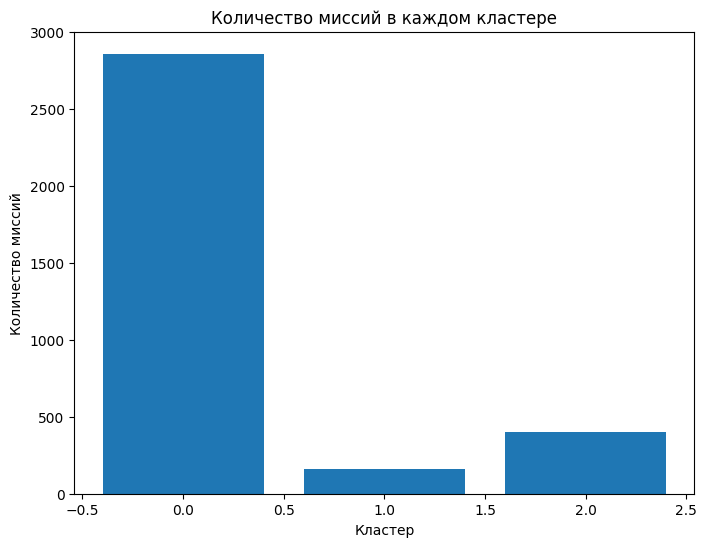

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Предобработка данных
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')  # Преобразуем Price в числовой формат
data['MissionStatus'] = data['MissionStatus'].str.strip()

# Выбор столбцов для кластеризации
columns_to_cluster = ['Company', 'Location', 'Price', 'MissionStatus']
data_cluster = data[columns_to_cluster].dropna()

# Кодирование категориальных данных и нормализация числовых
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), ['Price']),
    ('cat', OneHotEncoder(), ['Company', 'Location', 'MissionStatus'])
])

# Настройка и обучение модели кластеризации
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

pipeline.fit(data_cluster)

# Присвоение кластеров к данным
data_cluster['Cluster'] = pipeline['kmeans'].labels_

# Анализ кластеров
# Рассмотрим только числовые столбцы для вычисления среднего
numeric_columns = ['Price']
cluster_analysis = data_cluster.groupby('Cluster')[numeric_columns].mean()

# Анализ категориальных данных (доли)
categorical_columns = ['Company', 'Location', 'MissionStatus']
for col in categorical_columns:
    print(f"Частоты для столбца '{col}' по кластерам:")
    print(data_cluster.groupby('Cluster')[col].value_counts(normalize=True))
    print("-" * 50)

# Визуализация распределения кластеров
plt.figure(figsize=(8, 6))
plt.bar(data_cluster['Cluster'].value_counts().index, data_cluster['Cluster'].value_counts().values)
plt.title('Количество миссий в каждом кластере')
plt.xlabel('Кластер')
plt.ylabel('Количество миссий')
plt.show()


	4.2 Реализовать одну или несколько моделей которые могут описать ваши данные (Например, линейная регрессия). При использовании статистических методов рассчитать критерии достоверности.

Ход работы
Реализуем линейную регрессию для анализа зависимости стоимости миссии (Price) от компании (Company) и локации (Location). Будем использовать методику обработки категориальных переменных и критерии достоверности модели (R² и p-value). Вот пример кода:

In [30]:
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Загрузка данных
file_path = "dataset/space_missions.csv"
data = pd.read_csv(file_path)

# Предобработка данных
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')  # Преобразуем Price в числовой формат
data = data.dropna(subset=['Price', 'Company', 'Location'])  # Убираем строки с пропущенными значениями

# Выбор признаков и целевой переменной
X = data[['Company', 'Location']]
y = data['Price']

# Кодирование категориальных данных
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), ['Company', 'Location'])
], remainder='passthrough')

X_encoded = preprocessor.fit_transform(X).toarray()  # Преобразуем в плотный массив

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Добавление столбца для свободного члена (константы) в модели
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Построение модели линейной регрессии
model = sm.OLS(y_train, X_train).fit()

# Вывод результатов модели
print(model.summary())

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели на обучающей выборке (R²)
r_squared = model.rsquared
print(f"R² на обучающих данных: {r_squared:.4f}")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     700.1
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:36:39   Log-Likelihood:                -4177.0
No. Observations:                1000   AIC:                             8528.
Df Residuals:                     913   BIC:                             8955.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.3518      6.321     13.661      0.0

	1. Изучить данные и параметры. Описать показатели каждого параметра: типы данных, медиана, среднее.

Ход работы: 

Импорт библиотек и загрузка данных

Используйте pandas для работы с данными.
Загрузите файл CSV с помощью pd.read_csv.
Изучение параметров и типов данных:

Просмотрите типы данных с помощью метода .info().
Используйте .describe() для числовых данных и .value_counts() для категориальных данных.
Рассчитайте медиану и среднее:

Для числовых данных воспользуйтесь методами .median() и .mean().

	2. Провести предпроцессинг данных: проанализировать выбросы и очистить набор данных.

C:\Users\mset6\AppData\Local\Temp\ipykernel_17420\2975533007.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Price'].fillna(data['Price'].median(), inplace=True)  # Заполняем медианой


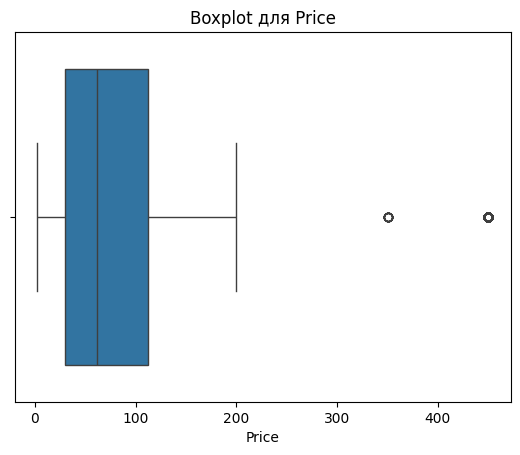

После обработки:
<class 'pandas.core.frame.DataFrame'>
Index: 1101 entries, 303 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        1101 non-null   object        
 1   Location       1101 non-null   object        
 2   Date           1101 non-null   datetime64[ns]
 3   Time           1095 non-null   object        
 4   Rocket         1101 non-null   object        
 5   Mission        1101 non-null   object        
 6   RocketStatus   1101 non-null   object        
 7   Price          1101 non-null   float64       
 8   MissionStatus  1101 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 86.0+ KB
None


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


# Заполнение пропущенных значений в числовых столбцах
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')  # Преобразуем Price в числовой тип
data['Price'].fillna(data['Price'].median(), inplace=True)  # Заполняем медианой

# Проверка выбросов в числовых данных
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot для {column}")
    plt.show()

# Удаление выбросов с использованием межквартильного размаха (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in numeric_columns:
    data = remove_outliers(data, column)

# Приведение данных к единому формату (пример для Date)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Итоговые данные
print("После обработки:")
print(data.info())


Гипотеза 1. Конкретная компания влияет на успех своих миссий.


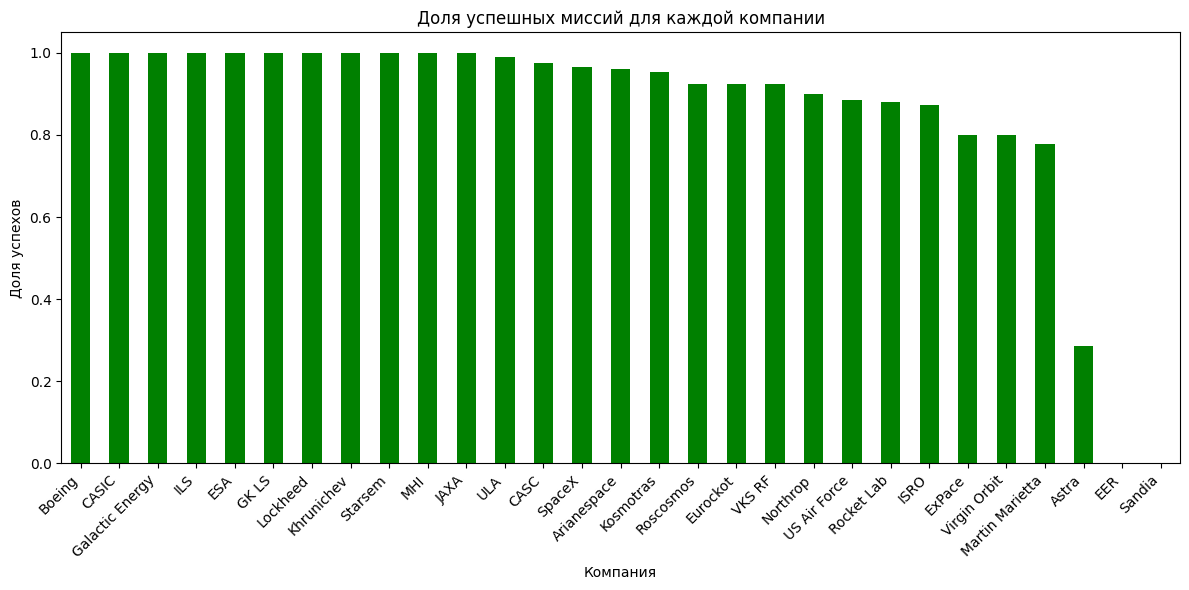

Результаты теста хи-квадрат:
Хи-квадрат: 191.18281111927044
p-значение: 2.4866963167538235e-10
Есть статистически значимая зависимость между компанией и статусом миссии.


In [32]:
import scipy as sc

# Предобработка данных
data['MissionStatus'] = data['MissionStatus'].str.strip()  # Убираем лишние пробелы

# Подсчет количества успешных и неуспешных миссий для каждой компании
company_status = data.groupby(['Company', 'MissionStatus']).size().unstack(fill_value=0)

# Вычисление доли успешных миссий для каждой компании
success_rate = company_status.div(company_status.sum(axis=1), axis=0)

# Визуализация доли успешных миссий
plt.figure(figsize=(12, 6))
success_rate['Success'].sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Доля успешных миссий для каждой компании')
plt.xlabel('Компания')
plt.ylabel('Доля успехов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Проведение статистического теста (хи-квадрат) для проверки зависимости
chi2, p, dof, expected = sc.stats.chi2_contingency(company_status)
print("Результаты теста хи-квадрат:")
print(f"Хи-квадрат: {chi2}")
print(f"p-значение: {p}")

if p < 0.05:
    print("Есть статистически значимая зависимость между компанией и статусом миссии.")
else:
    print("Нет статистически значимой зависимости между компанией и статусом миссии.")



Ход работы


Для вашего датасета о космических миссиях можно выделить правила или шаблоны, используя методы кластеризации или анализа ассоциаций. Пример задачи для описания набора данных: определить, какие компании, локации или ценовые диапазоны чаще связаны с успешными миссиями.

Шаги для выполнения задачи:
1. Подготовка данных для кластеризации:
Выберите ключевые параметры, влияющие на успешность миссий (например, Company, Location, Price, MissionStatus).
Закодируйте категориальные данные с помощью методов, таких как one-hot-encoding.
Нормализуйте числовые данные.
2. Кластеризация:
Используйте алгоритм, например, K-Means, для разделения миссий на кластеры.
Найдите оптимальное число кластеров (с помощью метода локтя или силуэт-анализа).
3. Интерпретация кластеров:
Определите характеристики миссий в каждом кластере: стоимость, компании, частота успехов.
Описание типов миссий, характерных для каждого кластера.


Числовые столбцы:
Средние значения рассчитываются только для столбцов с числовыми данными (Price).
Категориальные столбцы:
Для категориальных столбцов выводятся доли значений в каждом кластере.
Дополнительная проверка:
Убедитесь, что данные корректно подготовлены перед выполнением группировок.

	4.2 Реализовать одну или несколько моделей которые могут описать ваши данные (Например, линейная регрессия). При использовании статистических методов рассчитать критерии достоверности.

In [33]:
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Загрузка данных
file_path = "dataset/space_missions.csv"
data = pd.read_csv(file_path)

# Предобработка данных
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')  # Преобразуем Price в числовой формат
data = data.dropna(subset=['Price', 'Company', 'Location'])  # Убираем строки с пропущенными значениями

# Выбор признаков и целевой переменной
X = data[['Company', 'Location']]
y = data['Price']

# Кодирование категориальных данных
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), ['Company', 'Location'])
], remainder='passthrough')

X_encoded = preprocessor.fit_transform(X).toarray()  # Преобразуем в плотный массив

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Добавление столбца для свободного члена (константы) в модели
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Построение модели линейной регрессии
model = sm.OLS(y_train, X_train).fit()

# Вывод результатов модели
print(model.summary())

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели на обучающей выборке (R²)
r_squared = model.rsquared
print(f"R² на обучающих данных: {r_squared:.4f}")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     700.1
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:36:39   Log-Likelihood:                -4177.0
No. Observations:                1000   AIC:                             8528.
Df Residuals:                     913   BIC:                             8955.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.3518      6.321     13.661      0.0

	5. Реализовать дашбоард с обоснованием выбора диаграмм описывающих вашу гипотезу


Создание дашборда, который иллюстрирует гипотезу о влиянии компании на успех миссий, включает следующие шаги:

Обоснование выбора визуализаций:

Горизонтальные/вертикальные столбчатые диаграммы: Для наглядного сравнения долей успешных запусков между компаниями. Они интуитивно понятны и позволяют легко определить различия.
Таблица частот: Для отображения количества успешных и неуспешных миссий, что даёт контекст к визуализации.
Круговая диаграмма (по желанию): Для наглядного представления пропорций успехов внутри одной компании.
Хи-квадрат тест: Текстовый вывод для оценки статистической значимости зависимости между компанией и статусом миссий.
Интерактивный дашборд: Используем библиотеку dash или streamlit для создания дашборда.

In [35]:
import streamlit as st
from scipy.stats import chi2_contingency

# Загрузка данных
file_path = "dataset/space_missions.csv"
data = pd.read_csv(file_path)

# Предобработка данных
data['MissionStatus'] = data['MissionStatus'].str.strip()
success_rate = data.groupby('Company')['MissionStatus'].value_counts(normalize=True).unstack()
mission_counts = data.groupby('Company')['MissionStatus'].value_counts().unstack()

# Хи-квадрат тест
contingency_table = data.pivot_table(index='Company', columns='MissionStatus', aggfunc='size', fill_value=0)
chi2, p, _, _ = chi2_contingency(contingency_table)

# Streamlit дашборд
st.title("Анализ гипотезы: Влияние компании на успех миссий")
st.markdown("Гипотеза: Частота успешных запусков зависит от компании.")

# Визуализация доли успехов
st.subheader("Доля успешных миссий для каждой компании")
fig, ax = plt.subplots(figsize=(12, 6))
success_rate['Success'].plot(kind='bar', color='green', ax=ax)
plt.title('Доля успешных миссий для каждой компании')
plt.xlabel('Компания')
plt.ylabel('Доля успехов')
st.pyplot(fig)

# Таблица с количеством миссий
st.subheader("Частоты успешных и неуспешных миссий")
st.table(mission_counts)

# Вывод результатов хи-квадрат теста
st.subheader("Результаты статистического теста")
st.markdown(f"**Хи-квадрат значение**: {chi2:.2f}")
st.markdown(f"**p-значение**: {p:.4f}")
if p < 0.05:
    st.markdown("**Вывод:** Зависимость между компанией и успехом миссий статистически значима.")
else:
    st.markdown("**Вывод:** Зависимости между компанией и успехом миссий не выявлено.")

# Дополнительный график: Успехи внутри компании
selected_company = st.selectbox("Выберите компанию для анализа:", data['Company'].unique())
company_data = data[data['Company'] == selected_company]
company_status_counts = company_data['MissionStatus'].value_counts(normalize=True)

st.subheader(f"Успехи миссий компании {selected_company}")
fig, ax = plt.subplots(figsize=(6, 6))
company_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax)
plt.ylabel('')
plt.title(f'Распределение статуса миссий: {selected_company}')
st.pyplot(fig)

2024-12-05 18:36:42.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 18:36:42.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 18:36:42.804 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 18:36:42.804 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 18:36:42.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2024-12-05 18:36:42.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 18:36:42.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 18:36:43.152 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 18:36:43.152 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 18:36:43.153 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 18:36:43.153 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 18:36:43.154 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 18:36:43.155 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()